In [ ]:
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
dataset_zip = zipfile.ZipFile('datasets.zip','r')
dataset_zip.extractall()
dataset_zip.close()

In [ ]:
training = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
testing = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

training_generator = training.flow_from_directory(
    'datasets/train',
    target_size=(150, 150),
    shuffle=True,
    class_mode='binary',
)
testing_generator = training.flow_from_directory(
    'datasets/test',
    target_size=(150, 150),
    shuffle=True,
    class_mode='binary',
)

Found 361 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2340033 (8.93 MB)
Trainable params: 82049 

In [ ]:
history = model.fit(training_generator, validation_data=testing_generator, epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5820: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


12/12 [==============================] - 22s 2s/step - loss: 0.4055 - accuracy: 0.8199 - val_loss: 1.2581 - val_accuracy: 0.6094
Epoch 2/50
12/12 [==============================] - 18s 1s/step - loss: 0.1821 - accuracy: 0.9363 - val_loss: 0.7998 - val_accuracy: 0.7812
Epoch 3/50
12/12 [==============================] - 17s 1s/step - loss: 0.1149 - accuracy: 0.9501 - val_loss: 0.8619 - val_accuracy: 0.7656
Epoch 4/50
12/12 [==============================] - 17s 1s/step - loss: 0.0707 - accuracy: 0.9751 - val_loss: 1.0979 - val_accuracy: 0.7344
Epoch 5/50
12/12 [==============================] - 18s 1s/step - loss: 0.0649 - accuracy: 0.9861 - val_loss: 1.2755 - val_accuracy: 0.7031
Epoch 6/50
12/12 [==============================] - 17s 1s/step - loss: 0.0459 - accuracy: 0.9778 - val_loss: 1.1039 - val_accuracy: 0.7031
Epoch 7/50
12/12 [==============================] - 16s 1s/step - loss: 0.0409 - accuracy: 0.9861 - val_loss: 1.1629 - val_accuracy: 0.7031
Epoch 8/50
12/12 [=============

12/12 - 25s - loss: 3.7250e-04 - accuracy: 1.0000 - 25s/epoch - 2s/step


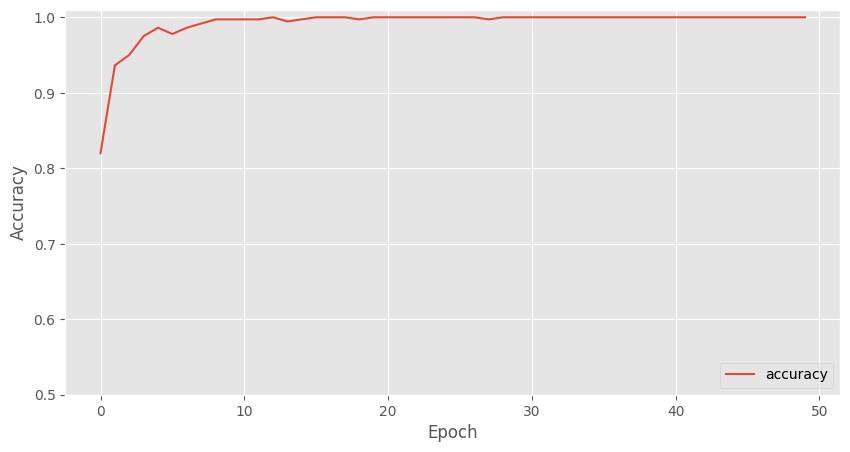

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')

train_loss, train_acc = model.evaluate(training_generator, verbose=2)

In [ ]:
result = model.evaluate(training_generator)

12/12 [==============================] - 18s 2s/step - loss: 3.7250e-04 - accuracy: 1.0000


Saving mentah (248).jpg to mentah (248).jpg
1/1 [==============================] - 0s 44ms/step
0.99095464
Unripe - Mentah, Kemiripan: 99%


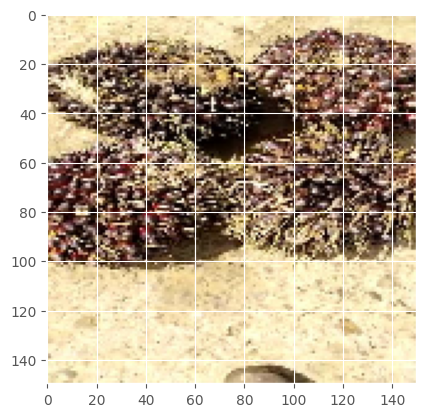

In [ ]:
from google.colab import files

image_data = files.upload()
image_file = list(image_data.keys())[0]
image = tf.keras.utils.load_img(image_file, target_size=(150, 150))
image_array = tf.keras.utils.img_to_array(image)
image_array = image_array / 255.
image_array = np.array([image_array])
result_predict = model.predict(image_array)[0][0]
print(result_predict)
if(result_predict > 0.5):
  print(f'Unripe - Mentah, Kemiripan: {int(result_predict * 100)}%')
else:
  print(f'Ripe - Matang, Kemiripan: {100 - int(result_predict * 100)}%')
plt.imshow(image)
plt.show()

In [ ]:
model.save('model-sawit-v01.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
